<a href="https://colab.research.google.com/github/nathangrinsztajn/Deep-Learning-H1/blob/master/deep_learning_H1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

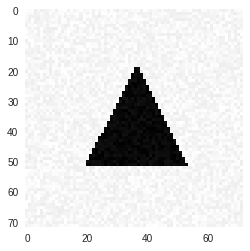

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.grid(None)

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]


# Simple classification

In [0]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = keras.utils.to_categorical(Y_train, num_classes=3)

First model : stochastic gradient descent.

In [0]:
model1 = Sequential()

model1.add(Dense(3, input_shape=(5184,))) 
model1.add(Activation('softmax')) 

#sgd= SGD(lr=0.01, decay=1e-6, momentum=0.5, nesterov=False) 
sgd= SGD(lr=0.01)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model1.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
300/300 [==============================] - 0s 938us/step - loss: 7.9089 - acc: 0.3300
Epoch 2/50
300/300 [==============================] - 0s 140us/step - loss: 8.8701 - acc: 0.3400
Epoch 3/50
300/300 [==============================] - 0s 140us/step - loss: 8.1051 - acc: 0.3300
Epoch 4/50
300/300 [==============================] - 0s 134us/step - loss: 7.5493 - acc: 0.3833
Epoch 5/50
300/300 [==============================] - 0s 155us/step - loss: 8.5063 - acc: 0.3267
Epoch 6/50
300/300 [==============================] - 0s 148us/step - loss: 7.3203 - acc: 0.4167
Epoch 7/50
300/300 [==============================] - 0s 149us/step - loss: 7.4736 - acc: 0.3967
Epoch 8/50
300/300 [==============================] - 0s 145us/step - loss: 7.6510 - acc: 0.3733
Epoch 9/50
300/300 [==============================] - 0s 142us/step - loss: 7.1377 - acc: 0.4400
Epoch 10/50
300/300 [==============================] - 0s 137us/step - loss: 7.6773 - acc: 0.4067
Epoch 11/50
300/300 [========

Second model : Adam

In [0]:
model2 = Sequential()

model2.add(Dense(3, input_shape=(5184,))) 
model2.add(Activation('softmax')) 

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
300/300 [==============================] - 0s 853us/step - loss: 1.5469 - acc: 0.4267
Epoch 2/50
300/300 [==============================] - 0s 231us/step - loss: 0.7049 - acc: 0.7233
Epoch 3/50
300/300 [==============================] - 0s 166us/step - loss: 0.4411 - acc: 0.8367
Epoch 4/50
300/300 [==============================] - 0s 185us/step - loss: 0.3874 - acc: 0.8267
Epoch 5/50
300/300 [==============================] - 0s 169us/step - loss: 0.3085 - acc: 0.9167
Epoch 6/50
300/300 [==============================] - 0s 165us/step - loss: 0.2408 - acc: 0.9300
Epoch 7/50
300/300 [==============================] - 0s 166us/step - loss: 0.2086 - acc: 0.9467
Epoch 8/50
300/300 [==============================] - 0s 167us/step - loss: 0.1706 - acc: 0.9767
Epoch 9/50
300/300 [==============================] - 0s 165us/step - loss: 0.1502 - acc: 0.9900
Epoch 10/50
300/300 [==============================] - 0s 150us/step - loss: 0.1614 - acc: 0.9533
Epoch 11/50
300/300 [========

We can see that Adam achieves a perfect accuracy. Since we have no hidden layer , vizualizing the weights gives direct insight on how the model works : 

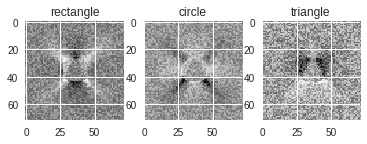

In [0]:
plt.subplot(1,3,1).set_title('rectangle')
plt.imshow(model.get_weights()[0][:,0].reshape((72, 72)))
plt.subplot(1,3,2).set_title('circle')
plt.imshow(model.get_weights()[0][:,1].reshape((72, 72)))
plt.subplot(1,3,3).set_title('triangle')
plt.imshow(model.get_weights()[0][:,2].reshape((72, 72)))

In [0]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model2.predict(X_test)

array([[1.574488e-22, 1.000000e+00, 0.000000e+00]], dtype=float32)

# A More Difficult Classification Problem

Now, we consider the more difficult case where figures are not centered anymore.

In [0]:
[X_train, Y_train] = generate_dataset_classification(5000, 20, True)
Y_train = keras.utils.to_categorical(Y_train, num_classes=3)
[X_test, Y_test] = generate_test_set_classification()

## Simple linear model

In [0]:
model2 = Sequential()

model2.add(Dense(3, input_shape=(5184,))) 
model2.add(Activation('softmax')) 

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
5000/5000 [==============================] - 1s 219us/step - loss: 1.0857 - acc: 0.5046
Epoch 2/50
5000/5000 [==============================] - 1s 181us/step - loss: 0.8889 - acc: 0.5744
Epoch 3/50
5000/5000 [==============================] - 1s 172us/step - loss: 0.8345 - acc: 0.6014
Epoch 4/50
5000/5000 [==============================] - 1s 171us/step - loss: 0.8494 - acc: 0.6020
Epoch 5/50
5000/5000 [==============================] - 1s 170us/step - loss: 0.9253 - acc: 0.5922
Epoch 6/50
5000/5000 [==============================] - 1s 168us/step - loss: 0.8278 - acc: 0.6120
Epoch 7/50
5000/5000 [==============================] - 1s 170us/step - loss: 0.8299 - acc: 0.6124
Epoch 8/50
5000/5000 [==============================] - 1s 169us/step - loss: 0.8332 - acc: 0.6162
Epoch 9/50
5000/5000 [==============================] - 1s 171us/step - loss: 0.8210 - acc: 0.6080
Epoch 10/50
5000/5000 [==============================] - 1s 169us/step - loss: 0.7569 - acc: 0.6370
Epoch 11/

## Simple convolutional model

In [0]:
X_train = X_train.reshape((X_train.shape[0], 72, 72, 1))
X_test = X_test.reshape(( X_test.shape[0], 72, 72, 1))

In [0]:
model3 = Sequential() 
model3.add(Conv2D(16, (5, 5), activation='relu', input_shape=(72, 72, 1))) 
print(model3.output_shape)
model3.add(Conv2D(16, (5, 5), activation='relu', input_shape=(72, 72, 1))) 
print(model3.output_shape)
model3.add(MaxPooling2D(pool_size=(2, 2)))
print(model3.output_shape)
model3.add(Flatten())
print(model3.output_shape)
model3.add(Dense(3, activation='softmax')) 


(None, 68, 68, 16)
(None, 64, 64, 16)
(None, 32, 32, 16)
(None, 16384)


In [0]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(X_train, Y_train, epochs=40, batch_size=32)

Epoch 1/40
5000/5000 [==============================] - 3s 635us/step - loss: 0.7438 - acc: 0.6460
Epoch 2/40
5000/5000 [==============================] - 3s 525us/step - loss: 0.3903 - acc: 0.8516
Epoch 3/40
5000/5000 [==============================] - 3s 530us/step - loss: 0.2515 - acc: 0.9050
Epoch 4/40
5000/5000 [==============================] - 3s 530us/step - loss: 0.1927 - acc: 0.9212
Epoch 5/40
5000/5000 [==============================] - 3s 535us/step - loss: 0.1482 - acc: 0.9408
Epoch 6/40
5000/5000 [==============================] - 3s 526us/step - loss: 0.1269 - acc: 0.9506
Epoch 7/40
5000/5000 [==============================] - 3s 529us/step - loss: 0.1011 - acc: 0.9614
Epoch 8/40
5000/5000 [==============================] - 3s 536us/step - loss: 0.0813 - acc: 0.9724
Epoch 9/40
5000/5000 [==============================] - 3s 544us/step - loss: 0.0658 - acc: 0.9766
Epoch 10/40
5000/5000 [==============================] - 3s 541us/step - loss: 0.0828 - acc: 0.9712
Epoch 11/

In [0]:
model3.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 880us/step


[0.16459187348683676, 0.953333334128062]

It is much better than the simple linear model.

# **A regression problem**

In [0]:
[X_train, Y_train0] = generate_dataset_regression(6000, 20)
[X_test, Y_test0] = generate_test_set_regression()
X_train = X_train.reshape((X_train.shape[0], 72, 72, 1))
X_test = X_test.reshape(( X_test.shape[0], 72, 72, 1))

## Naive approach

The difficulty here is that we want to predict a set and not a vector. Here is what output a naive approach.

In [18]:
model4 = Sequential() 
model4.add(Conv2D(16, (3, 3), activation='relu', input_shape=(72, 72, 1))) 
print(model4.output_shape)
model4.add(MaxPooling2D(pool_size=(2, 2)))
print(model4.output_shape)
model4.add(Conv2D(32, (3, 3), activation='relu')) 
model4.add(MaxPooling2D(pool_size=(2, 2)))
print(model4.output_shape)
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(Conv2D(128, (3, 3), activation='relu')) 
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
print(model4.output_shape)
model4.add(Dense(6))
   
model4.compile(loss='mean_squared_error', optimizer='adam')
model4.fit(X_train, Y_train0, epochs=40, batch_size=32)

(None, 70, 70, 16)
(None, 35, 35, 16)
(None, 16, 16, 32)
(None, 2048)
Epoch 1/40
6000/6000 [==============================] - 4s 584us/step - loss: 0.0851
Epoch 2/40
6000/6000 [==============================] - 3s 495us/step - loss: 0.0607
Epoch 3/40
6000/6000 [==============================] - 3s 492us/step - loss: 0.0588
Epoch 4/40
6000/6000 [==============================] - 3s 496us/step - loss: 0.0578
Epoch 5/40
6000/6000 [==============================] - 3s 495us/step - loss: 0.0572
Epoch 6/40
6000/6000 [==============================] - 3s 489us/step - loss: 0.0569
Epoch 7/40
6000/6000 [==============================] - 3s 492us/step - loss: 0.0565
Epoch 8/40
6000/6000 [==============================] - 3s 491us/step - loss: 0.0562
Epoch 9/40
6000/6000 [==============================] - 3s 493us/step - loss: 0.0555
Epoch 10/40
6000/6000 [==============================] - 3s 502us/step - loss: 0.0550
Epoch 11/40
6000/6000 [==============================] - 3s 503us/step - loss: 

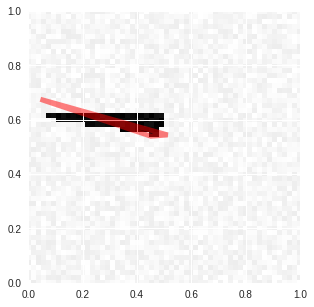

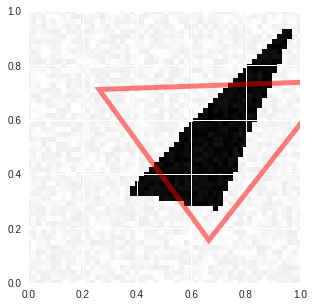

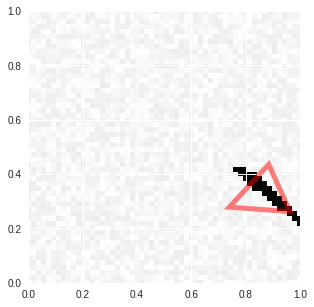

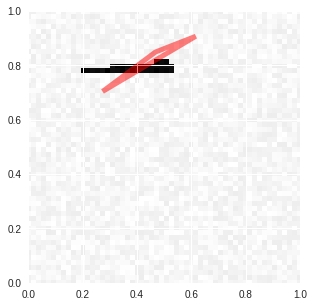

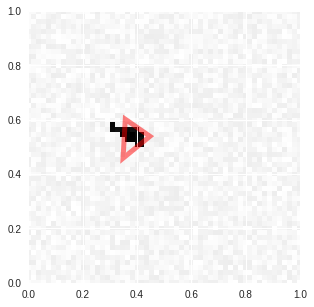

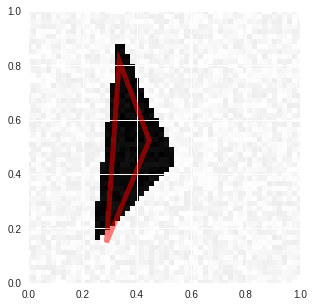

In [19]:
for i in range(3):
  visualize_prediction(X_train[i], model4.predict(X_train[i].reshape((1, 72, 72, 1)))[0])
  visualize_prediction(X_test[i], model4.predict(X_test[i].reshape((1, 72, 72, 1)))[0])

We can see that the model doesn't work very well : it is because we didn't take into account the fact that we want to predict a set of points and not a vector : the fact that the point are displayed in an arbitrary order is not handled by this model. A first work around is to order the point before training, for example with a lexicographical order.

## Second trial : reorder the points

In [0]:
def reorder_Y(Y):
  result = np.zeros(6)
  order = np.argsort(Y[[0,2,4]])
  result[[0, 2, 4]] = Y[[0,2,4]][order]
  result[[1, 3, 5]] = Y[[1,3,5]][order]
  return result


In [0]:
Y_train = np.apply_along_axis(arr = Y_train0, func1d = reorder_Y, axis = 1)
Y_test = np.apply_along_axis(arr = Y_test0, func1d = reorder_Y, axis = 1)

In [49]:
model4 = Sequential() 
model4.add(Conv2D(16, (3, 3), activation='relu', input_shape=(72, 72, 1))) 
print(model4.output_shape)
model4.add(MaxPooling2D(pool_size=(2, 2)))
print(model4.output_shape)
model4.add(Conv2D(32, (3, 3), activation='relu')) 
model4.add(MaxPooling2D(pool_size=(2, 2)))
print(model4.output_shape)
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(Conv2D(128, (3, 3), activation='relu')) 
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
print(model4.output_shape)
model4.add(Dense(6))
   
model4.compile(loss='mean_squared_error', optimizer='adam')

(None, 70, 70, 16)
(None, 35, 35, 16)
(None, 16, 16, 32)
(None, 2048)


In [50]:
model4.compile(loss='mean_squared_error', optimizer='adam')
model4.fit(X_train, Y_train, epochs=40, batch_size=32)

Epoch 1/40
6000/6000 [==============================] - 4s 710us/step - loss: 0.0504
Epoch 2/40
6000/6000 [==============================] - 3s 550us/step - loss: 0.0160
Epoch 3/40
6000/6000 [==============================] - 3s 545us/step - loss: 0.0107
Epoch 4/40
6000/6000 [==============================] - 3s 521us/step - loss: 0.0081
Epoch 5/40
6000/6000 [==============================] - 3s 517us/step - loss: 0.0069
Epoch 6/40
6000/6000 [==============================] - 3s 512us/step - loss: 0.0059
Epoch 7/40
6000/6000 [==============================] - 3s 509us/step - loss: 0.0052
Epoch 8/40
6000/6000 [==============================] - 3s 520us/step - loss: 0.0045
Epoch 9/40
6000/6000 [==============================] - 3s 507us/step - loss: 0.0041
Epoch 10/40
6000/6000 [==============================] - 3s 522us/step - loss: 0.0038
Epoch 11/40
6000/6000 [==============================] - 3s 513us/step - loss: 0.0038
Epoch 12/40
6000/6000 [==============================] - 3s 512

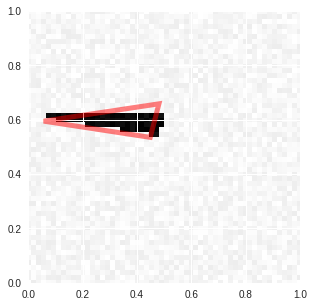

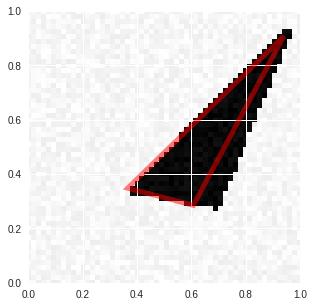

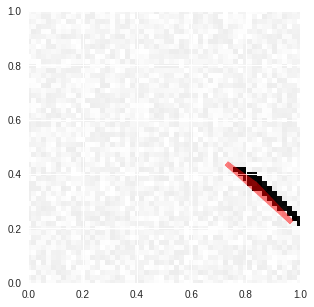

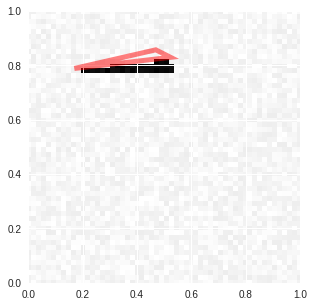

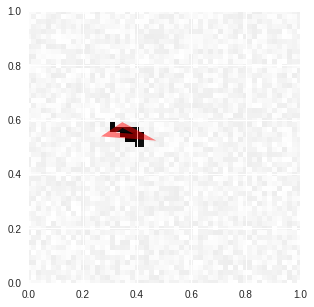

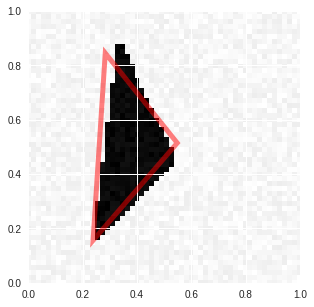

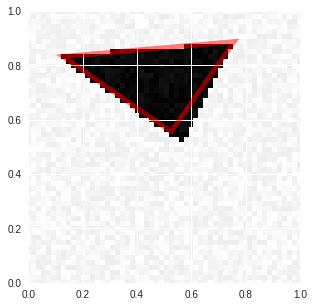

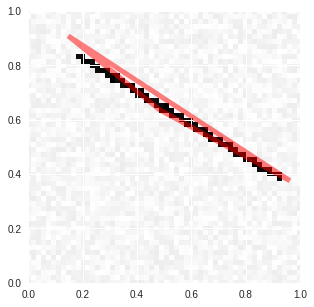

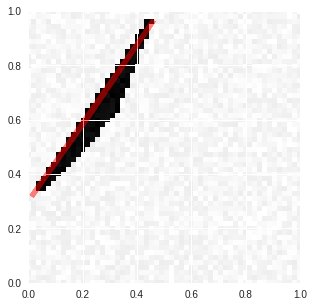

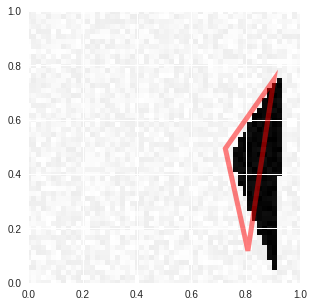

In [52]:
for i in range(5):
  visualize_prediction(X_train[i], model4.predict(X_train[i].reshape((1, 72, 72, 1)))[0])
  visualize_prediction(X_test[i], model4.predict(X_test[i].reshape((1, 72, 72, 1)))[0])

In [51]:
model4.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 942us/step


0.003572125096494953

The results are a lot better. We can try another approach where we permute each batch in order to minimize its distance with the predictions of the current model.

## Third trial, permutation at each batch 

In [0]:
import random

In [53]:
model4 = Sequential() 
model4.add(Conv2D(16, (3, 3), activation='relu', input_shape=(72, 72, 1))) 
print(model4.output_shape)
model4.add(MaxPooling2D(pool_size=(2, 2)))
print(model4.output_shape)
model4.add(Conv2D(32, (3, 3), activation='relu')) 
model4.add(MaxPooling2D(pool_size=(2, 2)))
print(model4.output_shape)
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(Conv2D(128, (3, 3), activation='relu')) 
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
print(model4.output_shape)
model4.add(Dense(6))
   
model4.compile(loss='mean_squared_error', optimizer='adam')

(None, 70, 70, 16)
(None, 35, 35, 16)
(None, 16, 16, 32)
(None, 2048)


In [0]:
def best_permutation(v1, v2):
  v1 = v1.reshape(3,2)
  v2 = v2.reshape(3,2)
  current = np.sum(np.square(v1 - v2), axis=None)
  best_v = v2
  for i in range(3):
    for j in range(1, 3):
      new_v2 = np.concatenate((v2[i,:], v2[(i+j)%3,:], v2[3-(i+j)%3-i,:]), axis = 0).reshape((3,2))
      cur = np.sum(np.square(v1 - new_v2), axis=None)
      if cur < current:
        current = cur
        best_v = new_v2
  return best_v.reshape((6))

In [0]:
def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

In [0]:
!mkdir picture

In [0]:
def plot_specialize(nb_test_img, name):
  x, y = zip(*random.sample(list(zip(X_train, Y_train0)), 300))
  x = np.array(x)
  y = np.array(y)
  pred_y = model4.predict(x)
  #plt.ioff()
  fig = plt.figure()
  plt.plot(pred_y[:, 0], pred_y[:, 1], 'or', label = '1')
  plt.plot(pred_y[:, 2], pred_y[:, 3], 'og', label = '2')
  plt.plot(pred_y[:, 4], pred_y[:, 5], 'ob', label = '3')
  plt.legend()
  plt.savefig("picture/"+name)
  plt.close(fig)

In [54]:
num_epochs = 40
for epoch in range(num_epochs):
    #if epoch % 5 ==0:
      #plot_specialize(300, 'epoch {}'.format(epoch))
    print('Epoch', epoch)
    dataset = random.sample(list(zip(X_train, Y_train0)), len(list(zip(X_train, Y_train0))))
    for nb, b in enumerate(batch(dataset, 32)):
      if epoch<5:
        if (nb < 150) and nb%10==0:
          plot_specialize(300, 'epoch{}batch{}'.format(epoch, nb))
      bx, by = zip(*b)
      bx = np.array(bx)
      by = np.array(by)
      pred_y = model4.predict(bx)
      for i, (py, ytrain) in enumerate(zip(pred_y, by)):
        by[i] = best_permutation(py, ytrain)
      if nb==0:
        model4.fit(bx, by, epochs=1, verbose = 2, batch_size = 32)
      else:
        model4.fit(bx, by, epochs=1, verbose = 0, batch_size = 32)

Epoch 0
Epoch 1/1
 - 1s - loss: 0.3578
Epoch 1
Epoch 1/1
 - 0s - loss: 0.0115
Epoch 2
Epoch 1/1
 - 0s - loss: 0.0086
Epoch 3
Epoch 1/1
 - 0s - loss: 0.0062
Epoch 4
Epoch 1/1
 - 0s - loss: 0.0073
Epoch 5
Epoch 1/1
 - 0s - loss: 0.0041
Epoch 6
Epoch 1/1
 - 0s - loss: 0.0033
Epoch 7
Epoch 1/1
 - 0s - loss: 0.0036
Epoch 8
Epoch 1/1
 - 0s - loss: 0.0039
Epoch 9
Epoch 1/1
 - 0s - loss: 0.0025
Epoch 10
Epoch 1/1
 - 0s - loss: 0.0038
Epoch 11
Epoch 1/1
 - 0s - loss: 0.0037
Epoch 12
Epoch 1/1
 - 0s - loss: 0.0020
Epoch 13
Epoch 1/1
 - 0s - loss: 0.0036
Epoch 14
Epoch 1/1
 - 0s - loss: 0.0020
Epoch 15
Epoch 1/1
 - 0s - loss: 0.0028
Epoch 16
Epoch 1/1
 - 0s - loss: 0.0021
Epoch 17
Epoch 1/1
 - 0s - loss: 0.0019
Epoch 18
Epoch 1/1
 - 0s - loss: 0.0025
Epoch 19
Epoch 1/1
 - 0s - loss: 0.0018
Epoch 20
Epoch 1/1
 - 0s - loss: 0.0020
Epoch 21
Epoch 1/1
 - 0s - loss: 0.0020
Epoch 22
Epoch 1/1
 - 0s - loss: 0.0014
Epoch 23
Epoch 1/1
 - 0s - loss: 0.0013
Epoch 24
Epoch 1/1
 - 0s - loss: 0.0030
Epoch 25
E

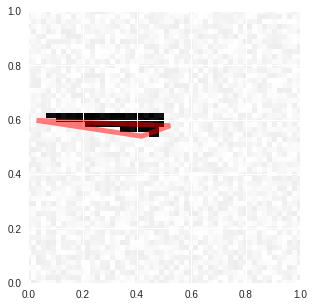

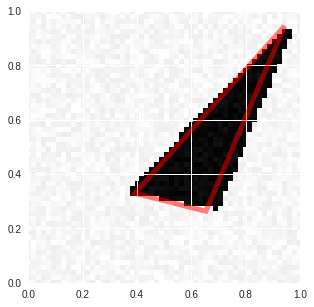

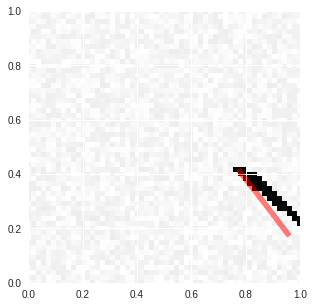

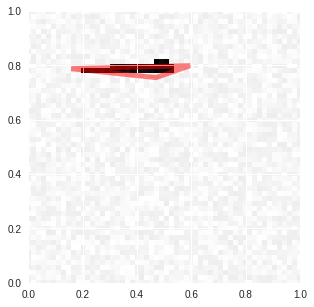

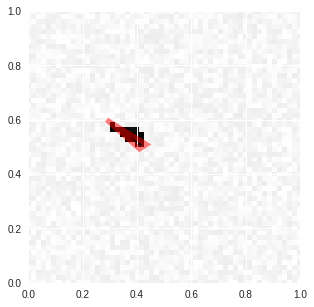

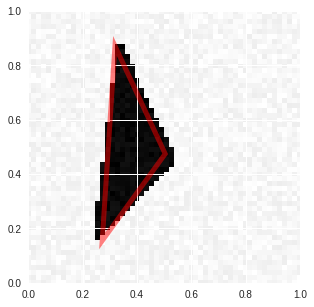

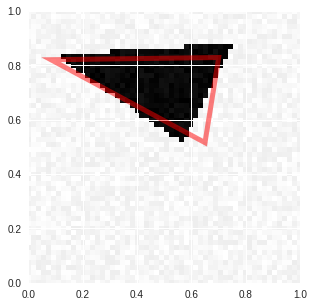

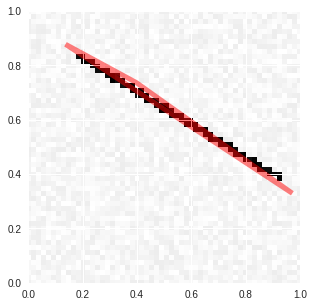

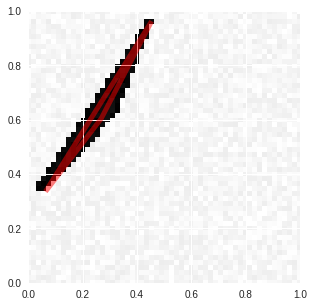

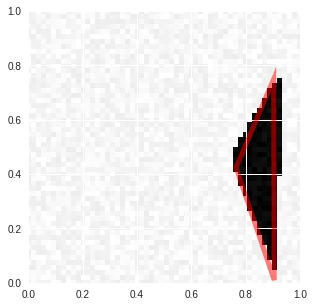

In [46]:
for i in range(5):
  visualize_prediction(X_train[i], model4.predict(X_train[i].reshape((1, 72, 72, 1)))[0])
  visualize_prediction(X_test[i], model4.predict(X_test[i].reshape((1, 72, 72, 1)))[0])

In [55]:
Y_test = np.zeros((Y_test0.shape[0], Y_test0.shape[1]))
pred_y = model4.predict(X_test)
for i, y in enumerate(Y_test0):
    Y_test[i] = best_permutation(pred_y[i], y)
model4.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 1ms/step


0.001723826015368104

We can see that our results are better than the previous solution, especially for triangle like the last one with two points which share the same x coordinate. Since we let the model permutate the variable according to its own "preferences", it is interesting to look at the distribution of the predicted vertices. These images are stored in the picture directory. Here is what we can see after 4 epochs : 

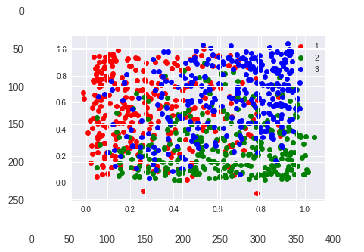

In [72]:
plot_specialize(300, 'final')
plt.imshow(plt.imread("picture/final.png"))

# Denoising

We first need to modify the generating functions.

In [0]:
def generate_a_rectangle_noised(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return [generate_a_drawing(figsize, U, V, noise), generate_a_drawing(figsize, U, V, 0)]


def generate_a_disk_noised(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return [generate_a_drawing(figsize, U, V, noise), generate_a_drawing(figsize, U, V, 0)]

def generate_a_triangle_noised(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, generate_a_drawing(figsize, U, V, 0)]
 
def generate_dataset_noised(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i], Y[i] = generate_a_rectangle_noised(noise, free_location)
        elif category == 1: 
            X[i], Y[i] = generate_a_disk_noised(noise, free_location)
        else:
            X[i], Y[i] = generate_a_triangle_noised(noise, free_location)
    X = (X + noise) / (255 + 2 * noise)
    Y = Y/255
    return [X, Y]
  
def plot_denoised(X, Y_hat, Y):
  fig = plt.figure()
  plt.subplot(1,3,1).set_title('noisy image')
  plt.imshow(X.reshape((72, 72)),cmap='gray', extent=[-0.15,1.15,-0.15,1.15])
  plt.subplot(1,3,2).set_title('real image')
  plt.imshow(Y.reshape((72, 72)), cmap='gray', extent=[-0.15,1.15,-0.15,1.15])
  plt.subplot(1,3,3).set_title('denoised image')
  plt.imshow(Y_hat.reshape((72, 72)), cmap='gray', extent=[-0.15,1.15,-0.15,1.15])
  plt.show()
  plt.close(fig)

In [0]:
X_train, Y_train = generate_dataset_noised(300, 75, True)
X_train = X_train.reshape((X_train.shape[0], 72, 72, 1))
Y_train = Y_train.reshape((Y_train.shape[0], 72, 72, 1))
Y_train = np.concatenate((Y_train, np.ones((Y_train.shape[0], 72, 72, 1))-Y_train[0]), axis = 3)

X_test, Y_test = generate_dataset_noised(100, 75, True)
X_test = X_test.reshape((X_test.shape[0], 72, 72, 1))
Y_test = Y_test.reshape((Y_test.shape[0], 72, 72, 1))
Y_test = np.concatenate((Y_test, np.ones((Y_test.shape[0], 72, 72, 1))-Y_test[0]), axis = 3)

In [0]:
input_img = Input(shape=(72, 72, 1))
conv1a = Conv2D(64, 3, activation = 'relu', padding = 'same')(input_img)
conv1b = Conv2D(64, 3, activation = 'relu', padding = 'same')(conv1a)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1b)
conv2a = Conv2D(128, 3, activation = 'relu', padding = 'same')(pool1)
conv2b = Conv2D(128, 3, activation = 'relu', padding = 'same')(conv2a)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2b)
conv3 = Conv2D(512, 3, activation = 'relu', padding = 'same')(pool2)
up4 = UpSampling2D(size = (2,2))(conv3)
conv4a = Conv2D(128, 3, activation = 'relu', padding = 'same')(up4)
conv4b = Conv2D(128, 3, activation = 'relu', padding = 'same')(conv4a)
up5 = UpSampling2D(size = (2,2))(conv4b)
conv5a = Conv2D(64, 3, activation = 'relu', padding = 'same')(up5)
conv5b = Conv2D(64, 3, activation = 'relu', padding = 'same')(conv5a)
conv6 = Conv2D(2, 1, activation = 'sigmoid', padding = 'same')(conv5b)

model5  = Model(input_img, conv6)
model5.compile(optimizer = 'adam',loss = 'binary_crossentropy')

In [76]:
model5.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
300/300 [==============================] - 6s 19ms/step - loss: 0.3965
Epoch 2/50
300/300 [==============================] - 2s 6ms/step - loss: 0.2598
Epoch 3/50
300/300 [==============================] - 2s 6ms/step - loss: 0.2027
Epoch 4/50
300/300 [==============================] - 2s 6ms/step - loss: 0.1756
Epoch 5/50
300/300 [==============================] - 2s 6ms/step - loss: 0.1359
Epoch 6/50
300/300 [==============================] - 2s 6ms/step - loss: 0.1268
Epoch 7/50
300/300 [==============================] - 2s 6ms/step - loss: 0.1192
Epoch 8/50
300/300 [==============================] - 2s 6ms/step - loss: 0.1155
Epoch 9/50
300/300 [==============================] - 2s 6ms/step - loss: 0.1082
Epoch 10/50
300/300 [==============================] - 2s 6ms/step - loss: 0.0960
Epoch 11/50
300/300 [==============================] - 2s 6ms/step - loss: 0.0921
Epoch 12/50
300/300 [==============================] - 2s 6ms/step - loss: 0.0890
Epoch 13/50
300/300 [===

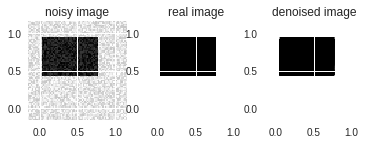

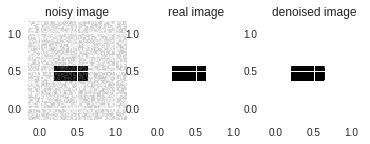

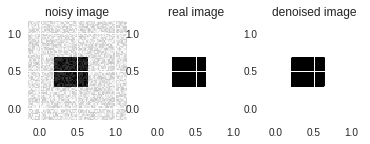

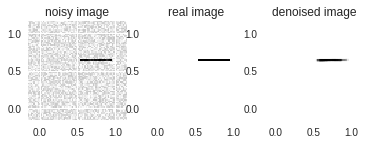

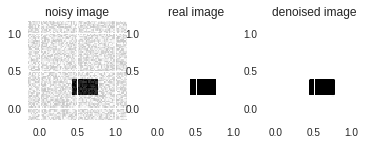

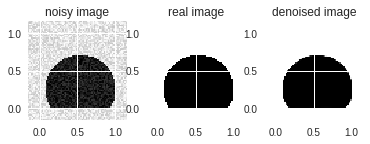

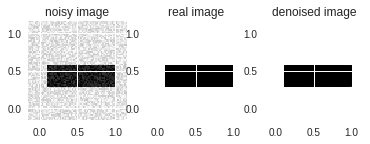

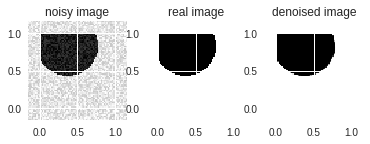

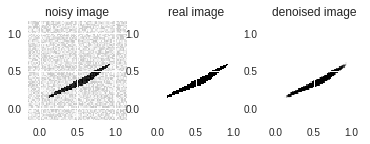

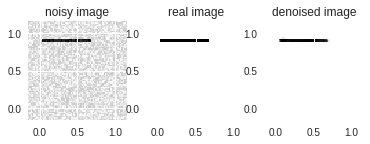

In [77]:
for i in range(10):
  plot_denoised(X_test[i], model5.predict(X_test[i].reshape((1, 72, 72, 1)))[0, :, :, 0], Y_test[i, :, :, 0])